# Ejercicio k-Nearest Neighbor

## App Reviews
En este ejercicio vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating, en función del sentimiento del comentario y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

## Importamos las librerías que vamos a utilizar

In [144]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

## Leemos nuestro archivo de entrada `reviews_sentiment`

In [145]:
df = pd.read_csv('data/reviews_sentiment.csv', sep=';')

In [146]:
df.head()

,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784


Para facilitar el ejercicio, las columnas que utilizaremos serán: wordcount con la cantidad de palabras utilizadas y sentimentValue con un valor entre -4 y 4 que indica si el comentario fue valorado como positivo o negativo

Nuestras etiquetas, serán las estrellas que dieron los usuarios a la app, que son valores discretos del 1 al 5

In [147]:
df = df.drop(['Review Title', 'Review Text', 'titleSentiment', 'textSentiment'], axis=1)

## Rápidas visualizaciones y análisis
Al menos realiza un análisis univariante y representa la distribución del rating. Realiza otras visualizaciones para ver la relación de tus datos.

In [148]:
df.head()

,wordcount,Star Rating,sentimentValue
0,23,1,-0.486389
1,20,1,-0.586187
2,4,1,-0.602240
3,17,1,-0.616271
4,6,1,-0.651784


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wordcount       257 non-null    int64  
 1   Star Rating     257 non-null    int64  
 2   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 6.1 KB


In [150]:
df.describe()

,wordcount,Star Rating,sentimentValue
count,257.000000,257.000000,257.000000
mean,11.501946,3.420233,0.383849
std,13.159812,1.409531,0.897987
min,1.000000,1.000000,-2.276469
25%,3.000000,3.000000,-0.108144
50%,7.000000,3.000000,0.264091
75%,16.000000,5.000000,0.808384
max,103.000000,5.000000,3.264579


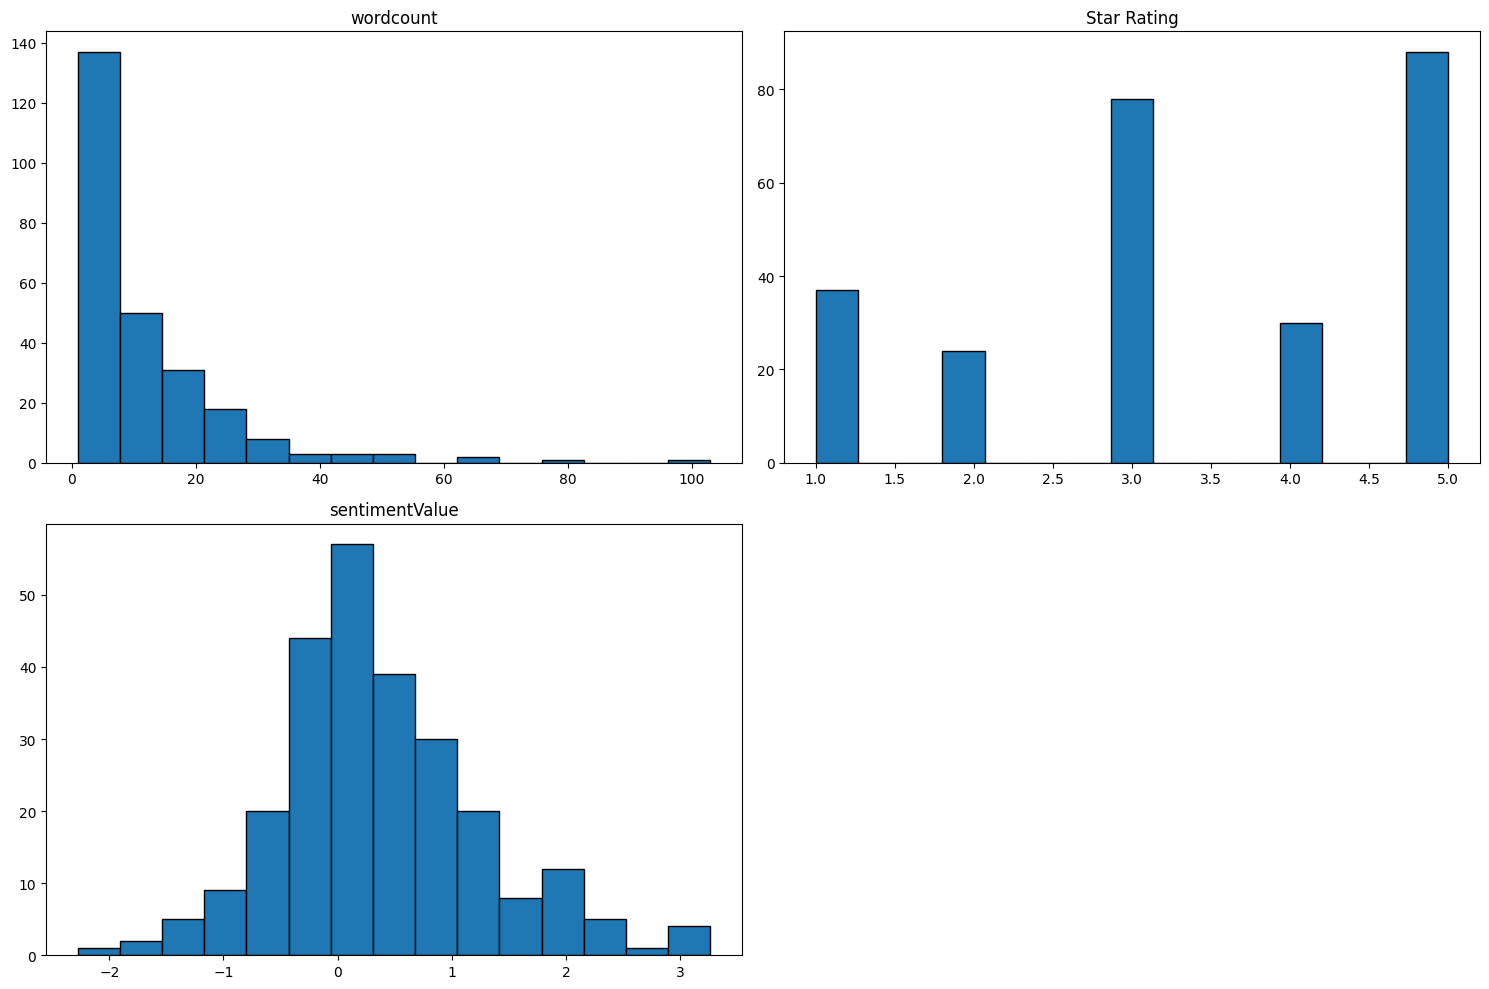

In [151]:
# Crear histogramas para todas las columnas numéricas
df.hist(bins=15, figsize=(15, 10), edgecolor='black', grid=False)

# Ajustar el diseño para que los gráficos no se solapen
plt.tight_layout()

# Mostrar los histogramas
plt.show()

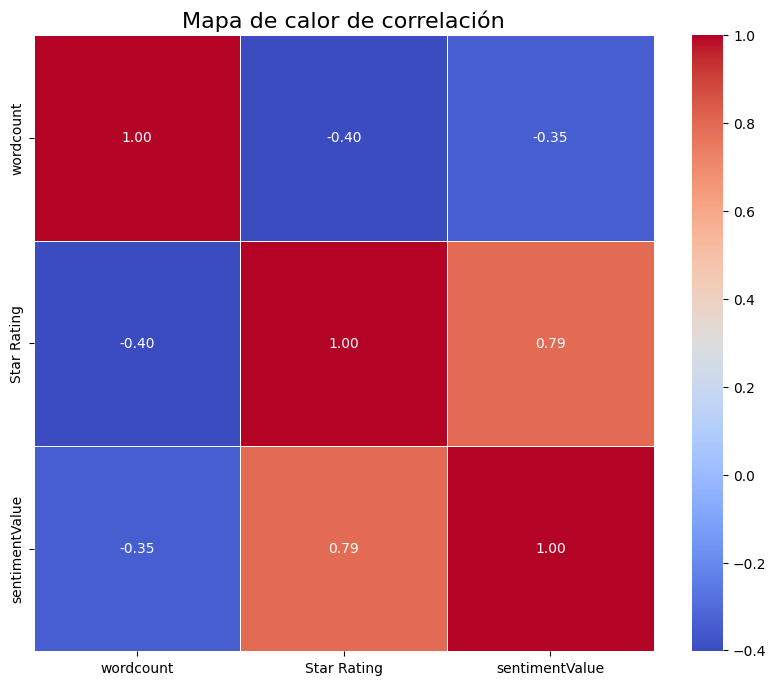

In [152]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Títulos y etiquetas
plt.title('Mapa de calor de correlación', fontsize=16)
plt.show()

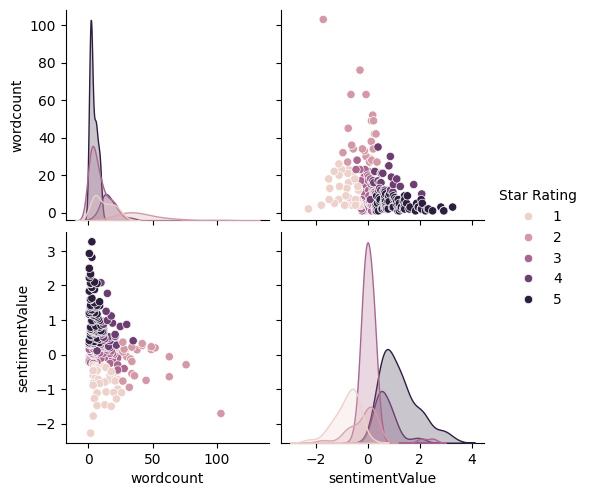

In [153]:
sns.pairplot(df, hue='Star Rating')

## Preparamos el dataset
Divide en train/test y escala las features en el rango [0, 1].

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   wordcount       257 non-null    int64  
 1   Star Rating     257 non-null    int64  
 2   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 6.1 KB


In [155]:
X = df[['wordcount', 'sentimentValue']]
y = df['Star Rating']

In [156]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
# Escalado de características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [158]:
df.head()

,wordcount,Star Rating,sentimentValue
0,23,1,-0.486389
1,20,1,-0.586187
2,4,1,-0.602240
3,17,1,-0.616271
4,6,1,-0.651784


## Creamos el Modelo
Entrena con un KNN y evalúa el error en train y en test

In [159]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [160]:
# Predicciones
y_pred = knn.predict(X_test_scaled)

In [161]:
# Calcular la precisión (precision score)
precision = precision_score(y_test, y_pred, average="weighted")
print("Precision Score:", precision)

Precision Score: 0.9005379236148467


In [162]:
# Definir los hiperparámetros a optimizar
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],          # Número de vecinos
}

# Configurar GridSearchCV
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring='precision_weighted',  # Métrica para optimizar
    cv=5,                          # Validación cruzada de 5 pliegues
    verbose=1                      # Mostrar progreso
)

# Ejecutar la búsqueda de hiperparámetros
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores parámetros y la precisión correspondiente
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejores parámetros:", best_params)
print("Mejor precisión ponderada:", best_score)

# Crear y entrenar el modelo optimizado
knn_best = KNeighborsClassifier(**best_params)
knn_best.fit(X_train_scaled, y_train)

# Evaluar el modelo optimizado
y_pred_best = knn_best.predict(X_test_scaled)
precision_best = precision_score(y_test, y_pred_best, average="weighted")
print("Precision Score del modelo optimizado:", precision_best)


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mejores parámetros: {'n_neighbors': 7}
Mejor precisión ponderada: 0.8973765115802419
Precision Score del modelo optimizado: 0.8999999999999999


## Evalúa tu modelo

In [163]:
# Evaluar el modelo optimizado con los mejores parámetros
y_pred_best = grid_search.best_estimator_.predict(X_test_scaled)

# Calcular precisión ponderada
precision_best = precision_score(y_test, y_pred_best, average="weighted")

# Generar informe de clasificación
classification_rep_best = classification_report(y_test, y_pred_best)

# Comparar predicciones y valores reales
resultados_evaluacion = pd.DataFrame({
    "Real Rating": y_test.values,
    "Predicted Rating": y_pred_best
})

# Mostrar resultados
print("Precision Score del modelo optimizado:", precision_best)
print("\nInforme de clasificación:")
print(classification_rep_best)


Precision Score del modelo optimizado: 0.8999999999999999

Informe de clasificación:
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        10
           2       0.40      1.00      0.57         2
           3       0.86      0.86      0.86        14
           4       1.00      0.57      0.73         7
           5       0.95      0.95      0.95        19

    accuracy                           0.87        52
   macro avg       0.82      0.86      0.80        52
weighted avg       0.90      0.87      0.87        52



In [164]:
# Predicciones en el conjunto de entrenamiento
y_train_pred = grid_search.best_estimator_.predict(X_train_scaled)

# Predicciones en el conjunto de prueba
y_test_pred = grid_search.best_estimator_.predict(X_test_scaled)

# Métricas en el conjunto de entrenamiento
precision_train = precision_score(y_train, y_train_pred, average="weighted")
classification_rep_train = classification_report(y_train, y_train_pred)

# Métricas en el conjunto de prueba
precision_test = precision_score(y_test, y_test_pred, average="weighted")
classification_rep_test = classification_report(y_test, y_test_pred)

# Imprimir resultados
print("Resultados en el conjunto de entrenamiento:")
print("Precision Score:", precision_train)
print("\nInforme de clasificación:")
print(classification_rep_train)

print("\nResultados en el conjunto de prueba:")
print("Precision Score:", precision_test)
print("\nInforme de clasificación:")
print(classification_rep_test)


Resultados en el conjunto de entrenamiento:
Precision Score: 0.9005317760219855

Informe de clasificación:
              precision    recall  f1-score   support

           1       0.96      0.89      0.92        27
           2       1.00      0.86      0.93        22
           3       0.81      0.95      0.88        64
           4       0.93      0.61      0.74        23
           5       0.92      0.94      0.93        69

    accuracy                           0.89       205
   macro avg       0.92      0.85      0.88       205
weighted avg       0.90      0.89      0.89       205


Resultados en el conjunto de prueba:
Precision Score: 0.8999999999999999

Informe de clasificación:
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        10
           2       0.40      1.00      0.57         2
           3       0.86      0.86      0.86        14
           4       1.00      0.57      0.73         7
           5       0.95      0.9

## ¿Cómo obtener el mejor valor de k? Crea y evalúa nuevos modelos
¿Qué valor de k maximiza el accuracy? Representa todas las iteraciones en un scatterplot -> k vs accuracy

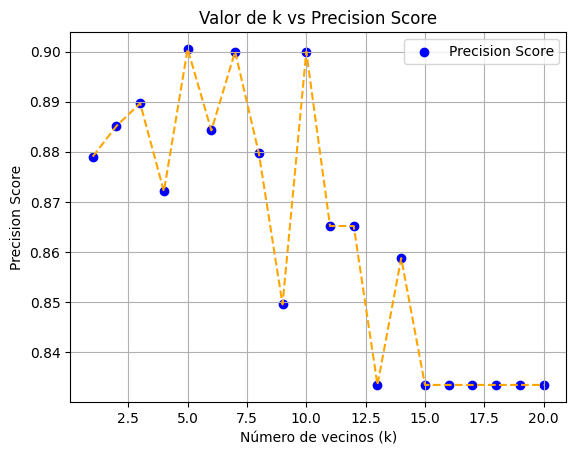

Mejor k: 5, Precision Score: 0.9005


In [165]:
# Probar diferentes valores de k
k_values = range(1, 21)
precision_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_test_pred = knn.predict(X_test_scaled)
    precision_scores.append(precision_score(y_test, y_test_pred, average="weighted"))

# Graficar k vs Precision Score
plt.scatter(k_values, precision_scores, label="Precision Score", color="blue")
plt.plot(k_values, precision_scores, linestyle="--", color="orange")
plt.xlabel("Número de vecinos (k)")
plt.ylabel("Precision Score")
plt.title("Valor de k vs Precision Score")
plt.grid()
plt.legend()
plt.show()

# Mejor k y su precisión
best_k = k_values[precision_scores.index(max(precision_scores))]
print(f"Mejor k: {best_k}, Precision Score: {max(precision_scores):.4f}")


## Predice con nuevos datos.
Ejemplo: supongamos que nos llega una review de 5 palabras y sentimiento 1

In [166]:
# Nuevo dato para predecir: 5 palabras y sentimiento 1
new_data = [[5, 1]]

# Escalar los nuevos datos
new_data_scaled = scaler.transform(new_data)

# Usar el mejor modelo (con k=1 en este caso) para predecir
best_knn = KNeighborsClassifier(n_neighbors=1)
best_knn.fit(X_train_scaled, y_train)  # Entrenar con los datos de entrenamiento
predicted_rating = best_knn.predict(new_data_scaled)

print(f"La predicción para el nuevo dato es: {predicted_rating[0]}")


La predicción para el nuevo dato es: 5


c:\Users\mikel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
